In [1]:
import pandas as pd
from pandas import Series, DataFrame 
import numpy as np

# Basic data information

In [2]:
pd.read_csv('train.csv')

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,...,250,FourthView,Na,0,10722,294,23,null,2821,null
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,...,90,OtherView,Na,133,7330,277,133,null,2259,null
5,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1,...,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110"
6,0,3,12,6b4f23dd215a5f11136c2f29214236cfee1f0122,fbd1bcaf2b33108d2c7f88ac41f0b0194b508a9b,windows_ie,112.82.93.*,80,89,3,...,90,0,0,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110"
7,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111"
8,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3,...,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110"
9,0,5,0,d1b7c7fdb88ce3aa78a540bb29848dd77329a574,63b4f9a3638f81af361ab3c4190fd3e1b5e70fea,windows_chrome,117.9.211.*,2,2,3,...,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110"


In [3]:
traindata = pd.read_csv('train.csv')
testdata = pd.read_csv('test.csv')
validationdata = pd.read_csv('validation.csv')

In [4]:
dataset = pd.DataFrame()


In [5]:
dataset['advertiser'] = np.sort(traindata.advertiser.unique())
dataset['impressions'] = traindata.groupby('advertiser').size().values
click = traindata.groupby('advertiser').click.value_counts()
dataset['clicks'] = click.iloc[click.index.get_level_values('click') == 1].values 
dataset['cost'] = traindata.groupby('advertiser').payprice.sum().values
dataset['CTR'] = round((dataset.clicks/dataset.impressions*100), 3).astype(str) + '%'
dataset['CPM'] = round((dataset.cost/dataset.impressions*100), 3).astype(str)
dataset['eCPC'] = round((dataset.cost/dataset.clicks*100), 3).astype(str)
dataset.to_csv('statics.csv')

In [6]:
dataset

,advertiser,impressions,clicks,cost,CTR,CPM,eCPC
0,1458,492353,385,33968736,0.078%,6899.265,8823048.312
1,2259,133673,43,12428238,0.032%,9297.493,28902879.07
2,2261,110122,36,9873779,0.033%,8966.218,27427163.889
3,2821,211366,131,18828044,0.062%,8907.792,14372552.672
4,2997,49829,217,3129267,0.435%,6280.012,1442058.525
5,3358,264956,202,22447231,0.076%,8472.06,11112490.594
6,3386,455041,320,34931823,0.07%,7676.632,10916194.688
7,3427,402806,272,30458711,0.068%,7561.633,11198055.515
8,3476,310835,187,23918779,0.06%,7695.008,12790790.909


# User feedback (take 1458 and 3358 as example)

#### Weekday CTR

In [99]:
import matplotlib.pyplot as plt


In [6]:
ccv = traindata.groupby(['weekday','advertiser','click'])
size=ccv.size()
size

weekday  advertiser  click
0        1458        0        76320
                     1           52
         2259        0        35648
                     1           13
         2821        0        99859
                     1           70
         3358        0        29482
                     1           22
         3386        0        70808
                     1           53
         3427        0        50154
                     1           29
         3476        0        58413
                     1           32
1        1458        0        66182
                     1           63
         2259        0        27052
                     1            9
         2821        0        83996
                     1           47
         3358        0        26707
                     1           16
         3386        0        61115
                     1           44
         3427        0        54156
                     1           33
         3476        0        48707
 

In [7]:
days, advertisers, clicks = size.keys().levels
days, advertisers, clicks

(Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='weekday'),
 Int64Index([1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476], dtype='int64', name='advertiser'),
 Int64Index([0, 1], dtype='int64', name='click'))

In [8]:
import matplotlib.pyplot as plt

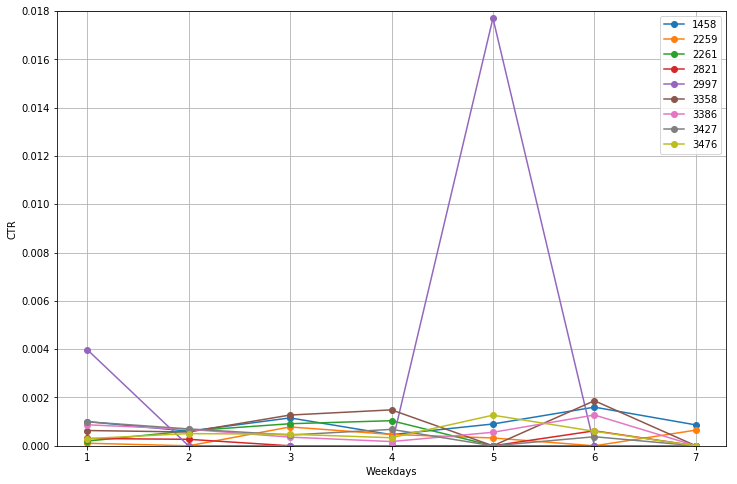

In [21]:
# plot_data = {}
# for adrs in advertisers:
#     tmp = []
#     for day in days:
#         try:
#             click_1 = size[day][adrs][1]
#             click_0 = size[day][adrs][0]
#             tmp.append(click_1/(click_0+click_1))
#         except:
#             tmp.append(0)
#     plot_data[adrs]=tmp

# plt.figure(figsize=(12,8))
# x = [1,2,3,4,5,6,7]
# for key,value in plot_data.items():
# #     if key in [1458, 3358]:
#     plt.plot(x, value, label=key, marker = 'o')
# plt.legend()
# plt.grid()
# plt.ylim(0, 0.018)
# plt.ylabel('CTR')
# plt.xlabel('Weekdays')
# plt.savefig('weekdayfirst.png')
# plt.show()

In [12]:
hoursct = traindata.groupby(['hour','advertiser','click'])
size=hoursct.size()
size

hour  advertiser  click
0     1458        0        22922
                  1           23
      2259        0         9432
                  1            1
      2261        0         5192
                  1            1
      2821        0         6616
                  1            2
      2997        0          250
                  1            1
      3358        0        60035
                  1           38
      3386        0        35618
                  1           31
      3427        0        20112
                  1           20
      3476        0        16864
                  1            5
1     1458        0         9894
                  1            6
      2259        0         5236
      2261        0         3239
                  1            2
      2821        0         3723
                  1            1
      2997        0          228
      3358        0         6998
                  1            4
      3386        0         8770
                  1

In [13]:
hours, advertisers, clicks = size.keys().levels
hours, advertisers, clicks

(Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23],
            dtype='int64', name='hour'),
 Int64Index([1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476], dtype='int64', name='advertiser'),
 Int64Index([0, 1], dtype='int64', name='click'))

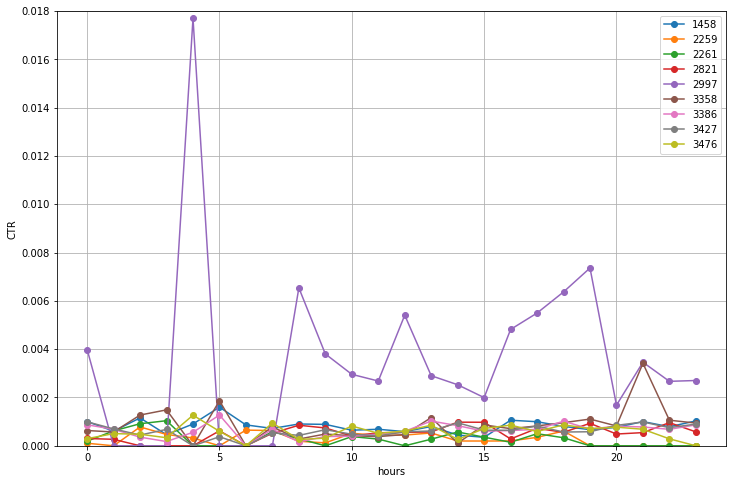

In [23]:
# plot_data = {}
# for adrs in advertisers:
#     tmp = []
#     for hour in hours:
#         try:
#             click_1 = size[hour][adrs][1]
#             click_0 = size[hour][adrs][0]
#             tmp.append(click_1/(click_0+click_1))
#         except:
#             tmp.append(0)
#     plot_data[adrs]=tmp

# plt.figure(figsize=(12,8))
# x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
# for key,value in plot_data.items():
# #     if key in [1458, 3358]:
#     plt.plot(x, value, label=key, marker = 'o')
# plt.legend()
# plt.grid()
# plt.ylim(0, 0.018)
# plt.ylabel('CTR')
# plt.xlabel('hours')
# plt.savefig('hourfirst.png')
# plt.show()

In [32]:
hoursct = traindata.groupby(['adexchange','advertiser','click'])
size=hoursct.size()
size

adexchange  advertiser  click
1           1458        0        165931
                        1           134
            2259        0         46744
                        1             5
            2261        0         35557
                        1            12
            2821        0         41389
                        1            27
            3358        0        133578
                        1           119
            3386        0        106221
                        1           141
            3427        0        101970
                        1           100
            3476        0         86293
                        1            50
2           1458        0        146398
                        1           115
            2259        0         46549
                        1             9
            2261        0         39643
                        1            14
            2821        0         46912
                        1            25
          

In [35]:
adexchanges, advertisers, clicks = size.keys().levels
adexchanges, advertisers, clicks

(Index(['1', '2', '3', '4', 'null'], dtype='object', name='adexchange'),
 Int64Index([1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476], dtype='int64', name='advertiser'),
 Int64Index([0, 1], dtype='int64', name='click'))

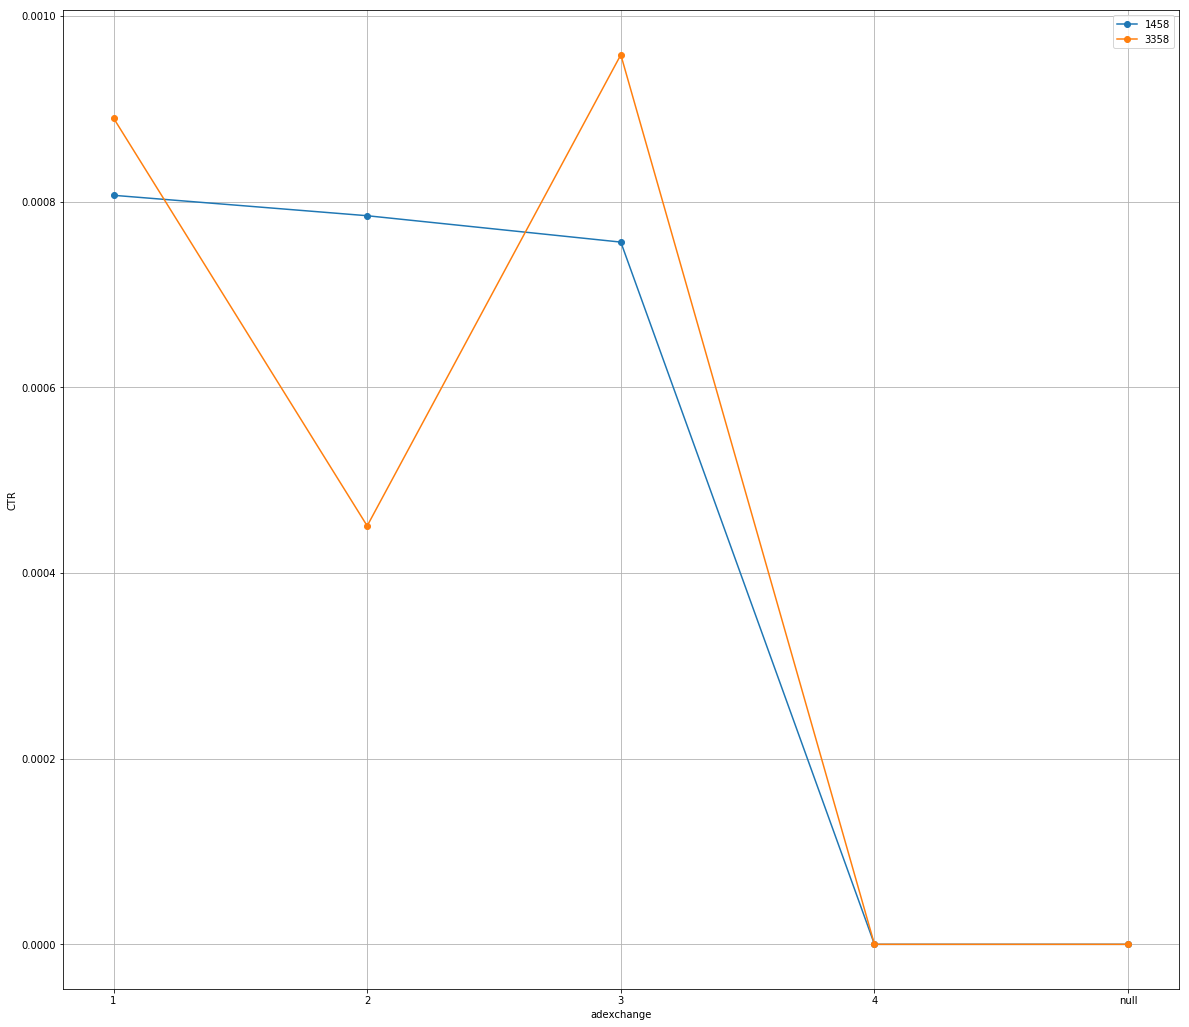

In [47]:
# plot_data = {}
# for adrs in advertisers:
#     tmp = []
#     for adexchange in adexchanges:
#         try:
#             click_1 = size[adexchange][adrs][1]
#             click_0 = size[adexchange][adrs][0]
#             tmp.append(click_1/(click_0+click_1))
#         except:
#             tmp.append(0)
#     plot_data[adrs]=tmp

# plt.figure(figsize=(20,18))
# plt.xticks((1,2,3,4,5),(u'1',u'2',u'3',u'4',u'null'))
# for key,value in plot_data.items():
#     if key in [1458, 3358]:
#         plt.plot(x, value, label=key, marker = 'o')
# plt.legend()
# plt.grid()
# # plt.ylim(0.00050, 0.00125)
# plt.ylabel('CTR')
# plt.xlabel('adexchange')
# plt.savefig('adexchangesecond.png')
# plt.show()

In [49]:
hoursct = traindata.groupby(['region','advertiser','click'])
size=hoursct.size()
size

region  advertiser  click
0       1458        0         7125
                    1            6
        2261        0        10766
                    1            4
        2821        0         7745
                    1            2
        2997        0            9
        3358        0         5567
                    1           10
        3386        0         9015
                    1           10
        3427        0         6481
                    1            6
        3476        0         5037
                    1            5
1       1458        0        21343
                    1           17
        2261        0         3073
                    1            1
        2821        0        10101
                    1            6
        2997        0         2198
                    1            5
        3358        0        10438
                    1           11
        3386        0        21420
                    1           13
        3427        0        

In [50]:
regions, advertisers, clicks = size.keys().levels
regions, advertisers, clicks

(Int64Index([  0,   1,   2,   3,  15,  27,  40,  55,  65,  79,  80,  94, 106,
             124, 134, 146, 164, 183, 201, 216, 238, 253, 275, 276, 298, 308,
             325, 333, 344, 359, 368, 374, 393, 394, 395],
            dtype='int64', name='region'),
 Int64Index([1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476], dtype='int64', name='advertiser'),
 Int64Index([0, 1], dtype='int64', name='click'))

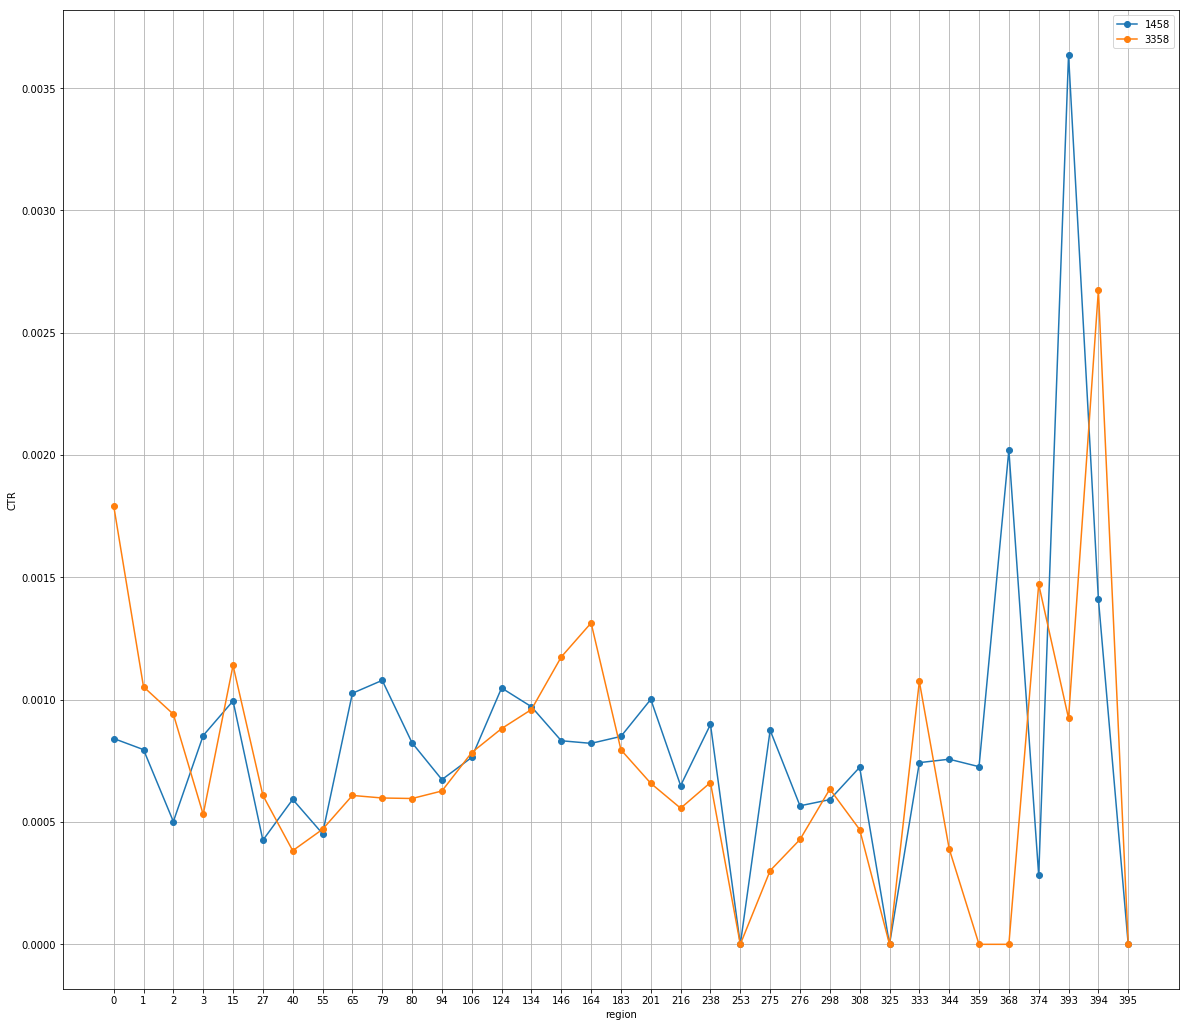

In [55]:
# plot_data = {}
# for adrs in advertisers:
#     tmp = []
#     for region in regions:
#         try:
#             click_1 = size[region][adrs][1]
#             click_0 = size[region][adrs][0]
#             tmp.append(click_1/(click_0+click_1))
#         except:
#             tmp.append(0)
#     plot_data[adrs]=tmp
# x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,
#             15,16,17,18,19,20,21,22,23,24,25,26,
#             27,28,29,30,31,32,33,34]
# plt.figure(figsize=(20,18))
# plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,
#             15,16,17,18,19,20,21,22,23,24,25,26,
#             27,28,29,30,31,32,33,34),
#            (u'0',u'1',u'2',u'3',u'15',
#             u'27',u'40',u'55',u'65',
#             u'79',u'80',u'94',u'106',
#            u'124',u'134',u'146',u'164',
#            u'183',u'201',u'216',u'238',
#            u'253',u'275',u'276',u'298',
#            u'308',u'325',u'333',u'344',
#            u'359',u'368',u'374',u'393',
#            u'394',u'395'))
# for key,value in plot_data.items():
#     if key in [1458, 3358]:
#         plt.plot(x, value, label=key, marker = 'o')
# plt.legend()
# plt.grid()
# # plt.ylim(0.00050, 0.00125)
# plt.ylabel('CTR')
# plt.xlabel('region')
# plt.savefig('regionsecond.png')
# plt.show()

In [79]:
traindata['os'] = traindata['useragent'].map(lambda x:x.split('_')[0])
traindata['browser'] = traindata['useragent'].map(lambda x:x.split('_')[1])

In [73]:
hoursct = traindata.groupby(['os','advertiser','click'])
size=hoursct.size()
size

os       advertiser  click
android  1458        0          3171
                     1            14
         2259        0           196
                     1             1
         2261        0           521
                     1             1
         2821        0          1860
                     1             6
         2997        0         49521
                     1           217
         3358        0          3782
                     1            18
         3386        0          2376
                     1            26
         3427        0          2283
                     1            26
         3476        0           337
                     1             3
ios      1458        0            78
                     1             1
         2259        0             9
         2261        0            27
         2821        0            55
                     1             1
         3358        0            66
         3386        0            86
         34

In [75]:
oss, advertisers, clicks = size.keys().levels
oss, advertisers, clicks

(Index(['android', 'ios', 'linux', 'mac', 'other', 'windows'], dtype='object', name='os'),
 Int64Index([1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476], dtype='int64', name='advertiser'),
 Int64Index([0, 1], dtype='int64', name='click'))

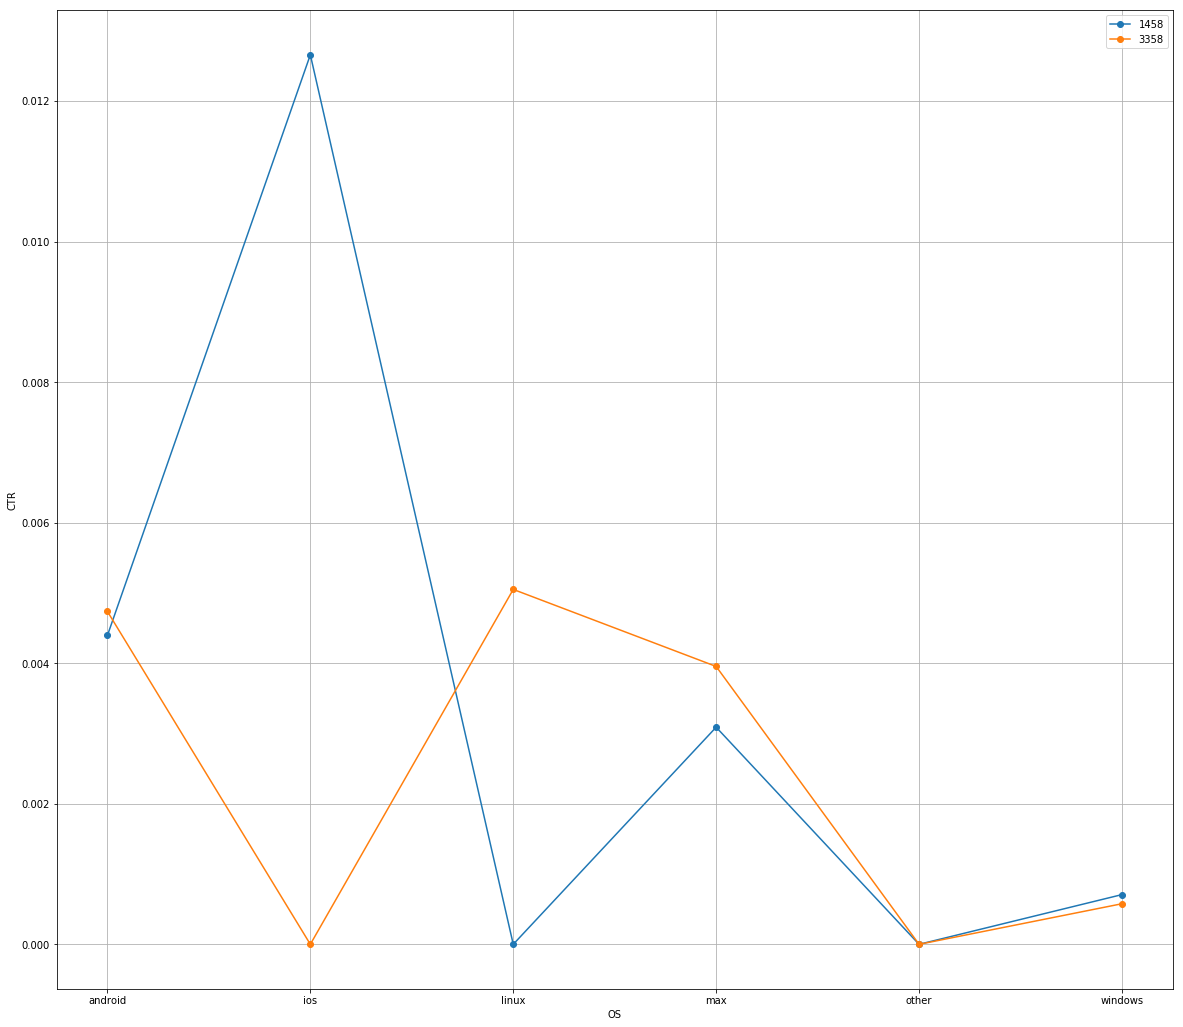

In [77]:
# plot_data = {}
# for adrs in advertisers:
#     tmp = []
#     for os in oss:
#         try:
#             click_1 = size[os][adrs][1]
#             click_0 = size[os][adrs][0]
#             tmp.append(click_1/(click_0+click_1))
#         except:
#             tmp.append(0)
#     plot_data[adrs]=tmp
# x=[0,1,2,3,4,5]
# plt.figure(figsize=(20,18))
# plt.xticks((0,1,2,3,4,5),(u'android',u'ios',u'linux',u'max',u'other',u'windows'))
# for key,value in plot_data.items():
#     if key in [1458, 3358]:
#         plt.plot(x, value, label=key, marker = 'o')
# plt.legend()
# plt.grid()
# # plt.ylim(0.00050, 0.00125)
# plt.ylabel('CTR')
# plt.xlabel('OS')
# plt.savefig('OSsecond.png')
# plt.show()

In [87]:
hoursct = traindata.groupby(['browser','advertiser','click'])
size=hoursct.size()
size


browser   advertiser  click
chrome    1458        0        147591
                      1            94
          2259        0         52810
                      1            13
          2261        0         38282
                      1             5
          2821        0         81317
                      1            39
          2997        0           125
          3358        0         85404
                      1            41
          3386        0        145570
                      1            60
          3427        0        135530
                      1            54
          3476        0        111004
                      1            53
firefox   1458        0          3633
                      1             2
          2259        0          1370
          2261        0          1153
                      1             1
          2821        0          2563
          3358        0          3057
                      1             2
          3386        

In [81]:
browsers, advertisers, clicks = size.keys().levels
browsers, advertisers, clicks

(Index(['chrome', 'firefox', 'ie', 'maxthon', 'opera', 'other', 'safari',
        'sogou', 'theworld'],
       dtype='object', name='browser'),
 Int64Index([1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476], dtype='int64', name='advertiser'),
 Int64Index([0, 1], dtype='int64', name='click'))

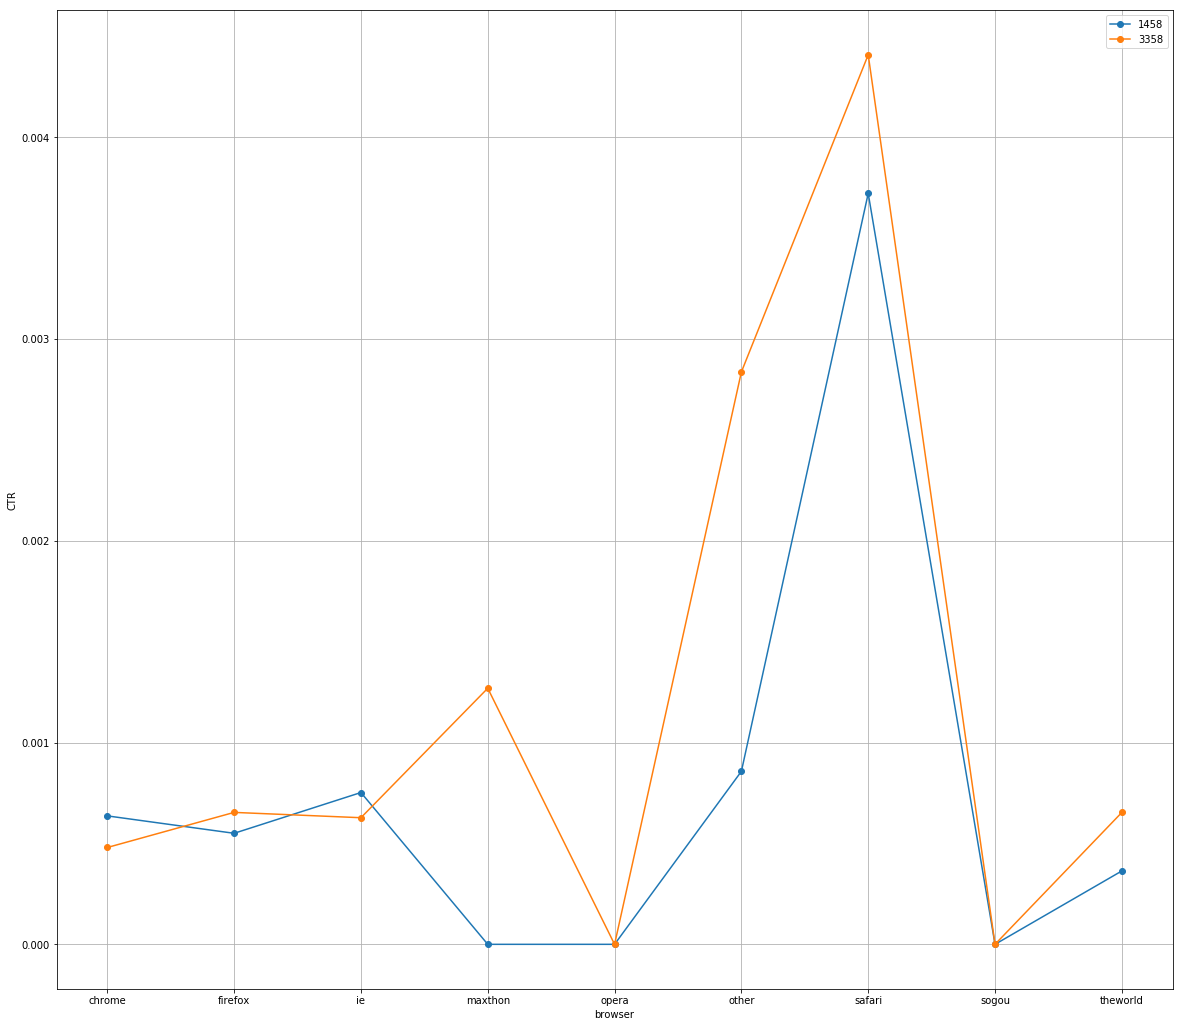

In [88]:
# plot_data = {}
# for adrs in advertisers:
#     tmp = []
#     for browser in browsers:
#         try:
#             click_1 = size[browser][adrs][1]
#             click_0 = size[browser][adrs][0]
#             tmp.append(click_1/(click_0+click_1))
#         except:
#             tmp.append(0)
#     plot_data[adrs]=tmp
# x=[0,1,2,3,4,5,6,7,8]
# plt.figure(figsize=(20,18))
# plt.xticks((0,1,2,3,4,5,6,7,8),(u'chrome',u'firefox',u'ie',u'maxthon',u'opera',u'other',u'safari',u'sogou',u'theworld'))
# for key,value in plot_data.items():
#     if key in [1458, 3358]:
#         plt.plot(x, value, label=key, marker = 'o')
# plt.legend()
# plt.grid()
# # plt.ylim(0.00050, 0.00125)
# plt.ylabel('CTR')
# plt.xlabel('browser')
# plt.savefig('browsersecond.png')
# plt.show()

In [89]:
traindata["slotsize"] = traindata.slotwidth.astype(str).str.cat(traindata.slotheight.astype(str), sep='*')

In [90]:
hoursct = traindata.groupby(['slotsize','advertiser','click'])
size=hoursct.size()
size

slotsize  advertiser  click
1000*90   1458        0        132976
                      1           101
          2259        0         20566
                      1            16
          2261        0         12200
                      1             7
          2821        0         22317
                      1            20
          3358        0         40014
                      1            40
          3386        0        126079
                      1            78
          3427        0        123205
                      1            88
          3476        0         75294
                      1            65
120*240   2259        0          3325
                      1             2
          2261        0          4381
                      1             2
120*600   2259        0           444
          2261        0          4897
          2821        0          6430
                      1             2
          3358        0           942
          3386        

In [91]:
slotsizes, advertisers, clicks = size.keys().levels
slotsizes, advertisers, clicks

(Index(['1000*90', '120*240', '120*600', '125*125', '160*600', '180*150',
        '180*600', '200*200', '234*60', '250*230', '250*250', '300*100',
        '300*250', '300*300', '300*600', '320*50', '336*280', '360*300',
        '468*60', '620*60', '640*90', '728*90', '760*90', '910*90', '950*90',
        '960*60', '960*90', '980*80', '980*90'],
       dtype='object', name='slotsize'),
 Int64Index([1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476], dtype='int64', name='advertiser'),
 Int64Index([0, 1], dtype='int64', name='click'))

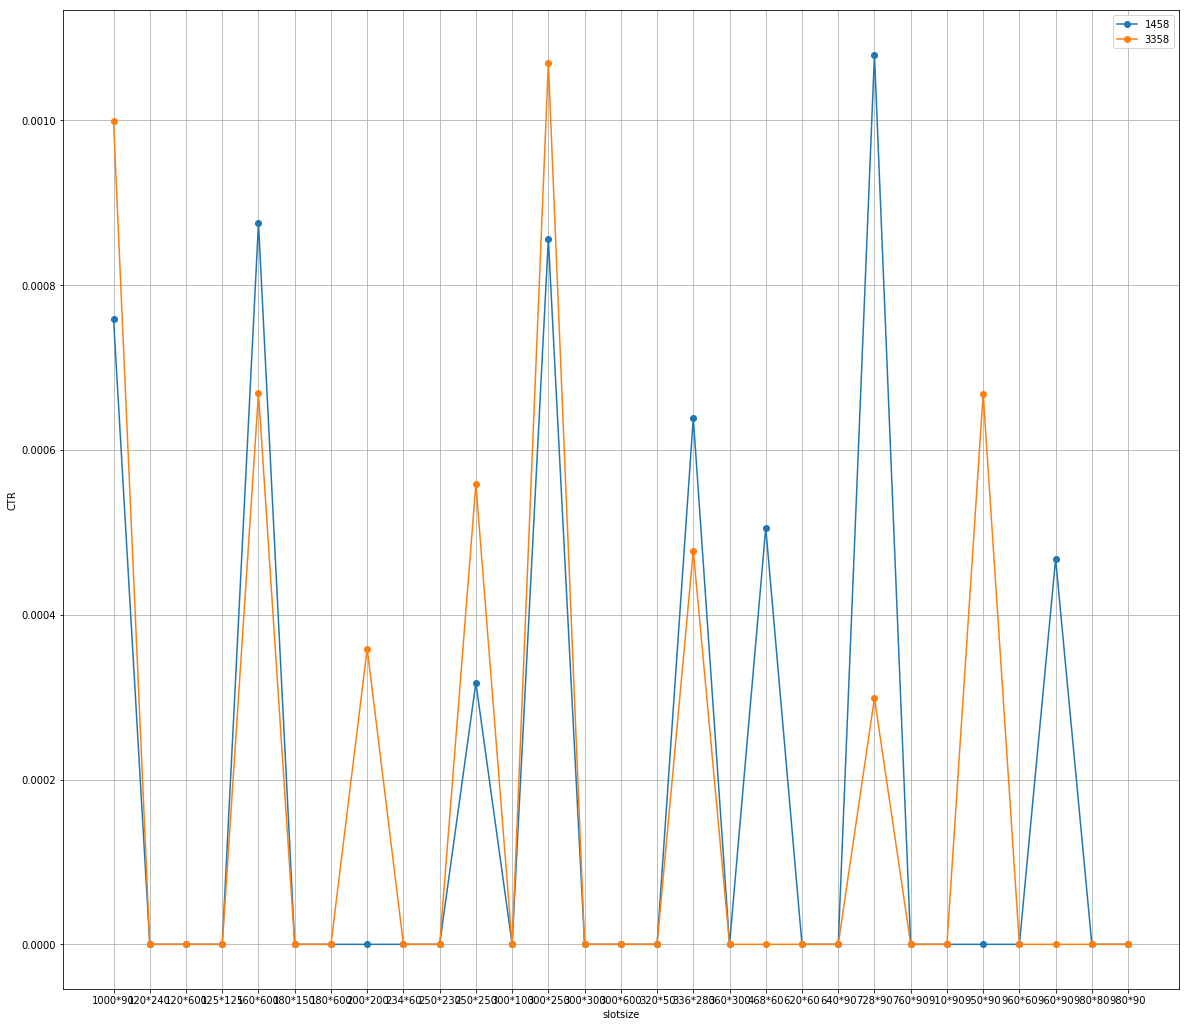

In [94]:
# plot_data = {}
# for adrs in advertisers:
#     tmp = []
#     for slotsize in slotsizes:
#         try:
#             click_1 = size[slotsize][adrs][1]
#             click_0 = size[slotsize][adrs][0]
#             tmp.append(click_1/(click_0+click_1))
#         except:
#             tmp.append(0)
#     plot_data[adrs]=tmp
# x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]
# plt.figure(figsize=(20,18))
# plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28),
#            (u'1000*90',u'120*240',u'120*600',u'125*125',u'160*600'
#             ,u'180*150',u'180*600',u'200*200',u'234*60',u'250*230'
#             ,u'250*250',u'300*100',u'300*250',u'300*300',u'300*600'
#             ,u'320*50',u'336*280',u'360*300',u'468*60',u'620*60'
#             ,u'640*90',u'728*90',u'760*90',u'910*90',u'950*90'
#             ,u'960*60',u'960*90',u'980*80',u'980*90'))
# for key,value in plot_data.items():
#     if key in [1458, 3358]:
#         plt.plot(x, value, label=key, marker = 'o')
# plt.legend()
# plt.grid()
# # plt.ylim(0.00050, 0.00125)
# plt.ylabel('CTR')
# plt.xlabel('slotsize')
# plt.savefig('slotsizesecond.png')
# plt.show()

# bidding price

In [115]:
ccv = traindata.groupby(['weekday','advertiser','payprice'])
size=ccv.size()
size

weekday  advertiser  payprice
0        1458        4            584
                     5           1150
                     6            296
                     7            418
                     8            439
                     9            347
                     10           933
                     11           239
                     12           465
                     13           448
                     14           299
                     15           397
                     16          1219
                     17          1377
                     18           477
                     19           438
                     20          7718
                     21           391
                     22           213
                     23           323
                     24           288
                     25           298
                     26           614
                     27           614
                     28           376
                    

In [116]:
days, advertisers, payprices = size.keys().levels
days, advertisers, payprices

(Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='weekday'),
 Int64Index([1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476], dtype='int64', name='advertiser'),
 Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             291, 292, 293, 294, 295, 296, 297, 298, 299, 300],
            dtype='int64', name='payprice', length=301))

In [117]:
size[0][3476]

payprice
0         6
1        34
2         2
3         7
4       350
5      1203
6       262
7       365
8       234
9       229
10      757
11      244
12      356
13      234
14      100
15      195
16      235
17      356
18      407
19      583
20      180
21     5544
22      168
23      322
24      296
25      409
26       64
27      225
28      232
29       92
       ... 
219      19
220      67
221      24
222      29
223      34
225     125
226     740
227      34
228      20
229      32
230      43
231      41
232      17
233      18
234      34
235      60
236      36
237      46
238      29
240      29
241       2
242      18
243       5
244      21
245       5
246      24
247      19
248      16
249      10
252      89
Length: 248, dtype: int64

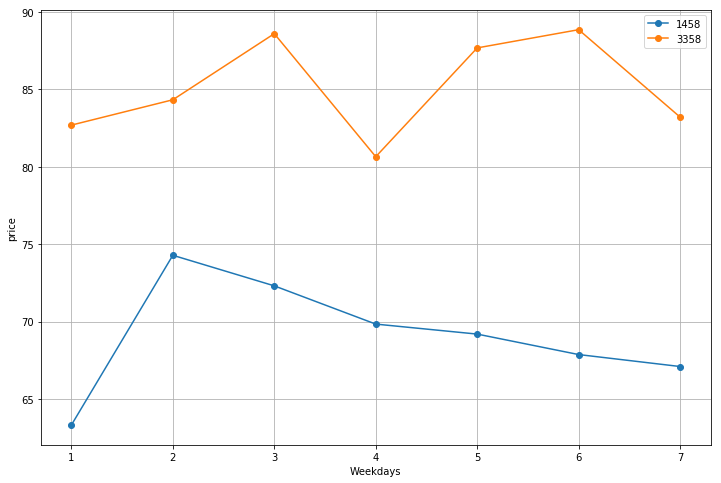

In [122]:
# plot_data = {}
# for adrs in advertisers:
#     tmp = []
#     for day in days:
#         pay_tmp = []
#         for pay in payprices:
#             try:
#                 price = size[day][adrs][pay]
#                 pay_tmp.append([pay, price])
#             except:
#                 pass
#         if pay_tmp==[]:
#             tmp.append(0)
#         else:
#             a, b = 0., 0.
#             for item in pay_tmp:
#                 a += item[0]*item[1]
#                 b += item[1]
#             tmp.append(a/b)
#     plot_data[adrs]=tmp

# plt.figure(figsize=(12,8))
# x = [1,2,3,4,5,6,7]
# for key,value in plot_data.items():
#     if key in [1458, 3358]:
#         plt.plot(x, value, label=key, marker = 'o')
# plt.legend()
# plt.grid()
# # plt.ylim(0, 0.018)
# plt.ylabel('price')
# plt.xlabel('Weekdays')
# plt.savefig('weekdaypricesecond.png')
# plt.show()

In [123]:
ccv = traindata.groupby(['hour','advertiser','payprice'])
size=ccv.size()
size

hour  advertiser  payprice
0     1458        3              1
                  4            119
                  5            423
                  6             91
                  7            135
                  8            140
                  9             80
                  10           384
                  11           166
                  12           194
                  13           220
                  14           138
                  15           255
                  16           250
                  17           436
                  18           142
                  19           232
                  20          1609
                  21           173
                  22            95
                  23           167
                  24           112
                  25           138
                  26           110
                  27            95
                  28            82
                  29           174
                  30        

In [124]:
hours, advertisers, payprices = size.keys().levels
hours, advertisers, payprices

(Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23],
            dtype='int64', name='hour'),
 Int64Index([1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476], dtype='int64', name='advertiser'),
 Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             291, 292, 293, 294, 295, 296, 297, 298, 299, 300],
            dtype='int64', name='payprice', length=301))

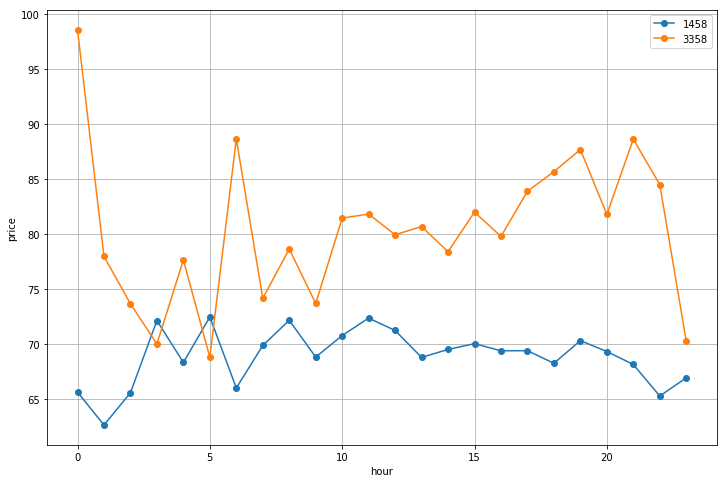

In [127]:
plot_data = {}
for adrs in advertisers:
    tmp = []
    for hour in hours:
        pay_tmp = []
        for pay in payprices:
            try:
                price = size[hour][adrs][pay]
                pay_tmp.append([pay, price])
            except:
                pass
        if pay_tmp==[]:
            tmp.append(0)
        else:
            a, b = 0., 0.
            for item in pay_tmp:
                a += item[0]*item[1]
                b += item[1]
            tmp.append(a/b)
    plot_data[adrs]=tmp

plt.figure(figsize=(12,8))
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
for key,value in plot_data.items():
    if key in [1458, 3358]:
        plt.plot(x, value, label=key, marker = 'o')
plt.legend()
plt.grid()
# plt.ylim(0, 0.018)
plt.ylabel('price')
plt.xlabel('hour')
plt.savefig('hourpricesecond.png')
plt.show()

In [144]:
ccv = traindata.groupby(['adexchange','advertiser','payprice'])
size=ccv.size()
size

adexchange  advertiser  payprice
1           1458        2              2
                        3              7
                        4           1449
                        5            414
                        6            371
                        7            651
                        8            949
                        9            648
                        10          1478
                        11          1313
                        12          1308
                        13          2031
                        14          1384
                        15          2422
                        16          4757
                        17          9305
                        18          2084
                        19          2883
                        20          1297
                        21          2797
                        22          1638
                        23          1398
                        24          1086
                        

In [145]:
adexchanges, advertisers, payprices = size.keys().levels
adexchanges, advertisers, payprices

(Index(['1', '2', '3', '4', 'null'], dtype='object', name='adexchange'),
 Int64Index([1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476], dtype='int64', name='advertiser'),
 Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             291, 292, 293, 294, 295, 296, 297, 298, 299, 300],
            dtype='int64', name='payprice', length=301))

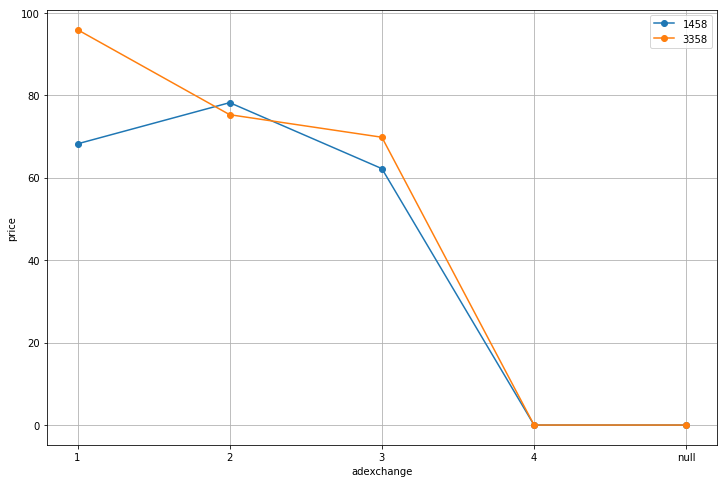

In [146]:
plot_data = {}
for adrs in advertisers:
    tmp = []
    for adexchange in adexchanges:
        pay_tmp = []
        for pay in payprices:
            try:
                price = size[adexchange][adrs][pay]
                pay_tmp.append([pay, price])
            except:
                pass
        if pay_tmp==[]:
            tmp.append(0)
        else:
            a, b = 0., 0.
            for item in pay_tmp:
                a += item[0]*item[1]
                b += item[1]
            tmp.append(a/b)
    plot_data[adrs]=tmp

plt.figure(figsize=(12,8))
x = [1,2,3,4,5]
plt.xticks((1,2,3,4,5),(u'1',u'2',u'3',u'4',u'null'))
for key,value in plot_data.items():
    if key in [1458, 3358]:
        plt.plot(x, value, label=key, marker = 'o')
plt.legend()
plt.grid()
# plt.ylim(0, 0.018)
plt.ylabel('price')
plt.xlabel('adexchange')
plt.savefig('adexchangepricesecond.png')
plt.show()

In [147]:
ccv = traindata.groupby(['region','advertiser','payprice'])
size=ccv.size()
size

region  advertiser  payprice
0       1458        2             1
                    4            62
                    5            77
                    6            34
                    7            49
                    8            35
                    9            29
                    10          106
                    11           66
                    12           49
                    13           65
                    14           72
                    15           77
                    16          134
                    17          211
                    18           64
                    19           98
                    20          350
                    21           64
                    22           37
                    23           41
                    24           41
                    25           46
                    26           58
                    27           16
                    28           29
                    29           25

In [148]:
regions, advertisers, payprices = size.keys().levels
regions, advertisers, payprices

(Int64Index([  0,   1,   2,   3,  15,  27,  40,  55,  65,  79,  80,  94, 106,
             124, 134, 146, 164, 183, 201, 216, 238, 253, 275, 276, 298, 308,
             325, 333, 344, 359, 368, 374, 393, 394, 395],
            dtype='int64', name='region'),
 Int64Index([1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476], dtype='int64', name='advertiser'),
 Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             291, 292, 293, 294, 295, 296, 297, 298, 299, 300],
            dtype='int64', name='payprice', length=301))

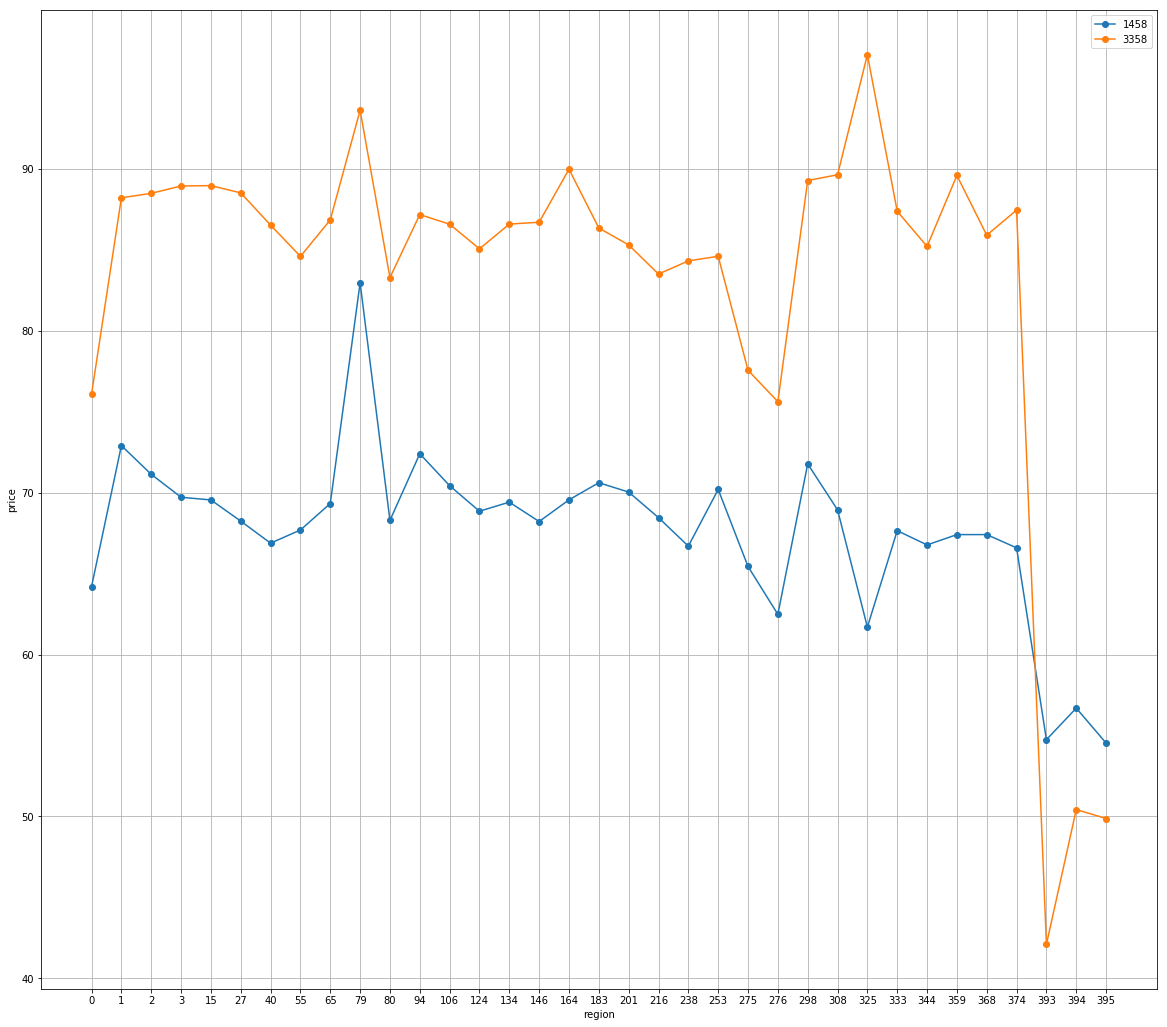

In [150]:
plot_data = {}
for adrs in advertisers:
    tmp = []
    for region in regions:
        pay_tmp = []
        for pay in payprices:
            try:
                price = size[region][adrs][pay]
                pay_tmp.append([pay, price])
            except:
                pass
        if pay_tmp==[]:
            tmp.append(0)
        else:
            a, b = 0., 0.
            for item in pay_tmp:
                a += item[0]*item[1]
                b += item[1]
            tmp.append(a/b)
    plot_data[adrs]=tmp

x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,
            15,16,17,18,19,20,21,22,23,24,25,26,
            27,28,29,30,31,32,33,34]
plt.figure(figsize=(20,18))
plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,
            15,16,17,18,19,20,21,22,23,24,25,26,
            27,28,29,30,31,32,33,34),
           (u'0',u'1',u'2',u'3',u'15',
            u'27',u'40',u'55',u'65',
            u'79',u'80',u'94',u'106',
           u'124',u'134',u'146',u'164',
           u'183',u'201',u'216',u'238',
           u'253',u'275',u'276',u'298',
           u'308',u'325',u'333',u'344',
           u'359',u'368',u'374',u'393',
           u'394',u'395'))
for key,value in plot_data.items():
    if key in [1458, 3358]:
        plt.plot(x, value, label=key, marker = 'o')
plt.legend()
plt.grid()
# plt.ylim(0, 0.018)
plt.ylabel('price')
plt.xlabel('region')
plt.savefig('regionpricesecond.png')
plt.show()

In [151]:
traindata['os'] = traindata['useragent'].map(lambda x:x.split('_')[0])
traindata['browser'] = traindata['useragent'].map(lambda x:x.split('_')[1])

In [152]:
ccv = traindata.groupby(['os','advertiser','payprice'])
size=ccv.size()
size

os       advertiser  payprice
android  1458        3              1
                     4             19
                     5              4
                     6              9
                     7             27
                     8             13
                     9              4
                     10            19
                     11            28
                     12            11
                     13            31
                     14            20
                     15            16
                     16            44
                     17            41
                     18            31
                     19            15
                     20            94
                     21            47
                     22            25
                     23            22
                     24            20
                     25            42
                     26            37
                     27            18
                    

In [153]:
oss, advertisers, payprices = size.keys().levels
oss, advertisers, payprices

(Index(['android', 'ios', 'linux', 'mac', 'other', 'windows'], dtype='object', name='os'),
 Int64Index([1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476], dtype='int64', name='advertiser'),
 Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             291, 292, 293, 294, 295, 296, 297, 298, 299, 300],
            dtype='int64', name='payprice', length=301))

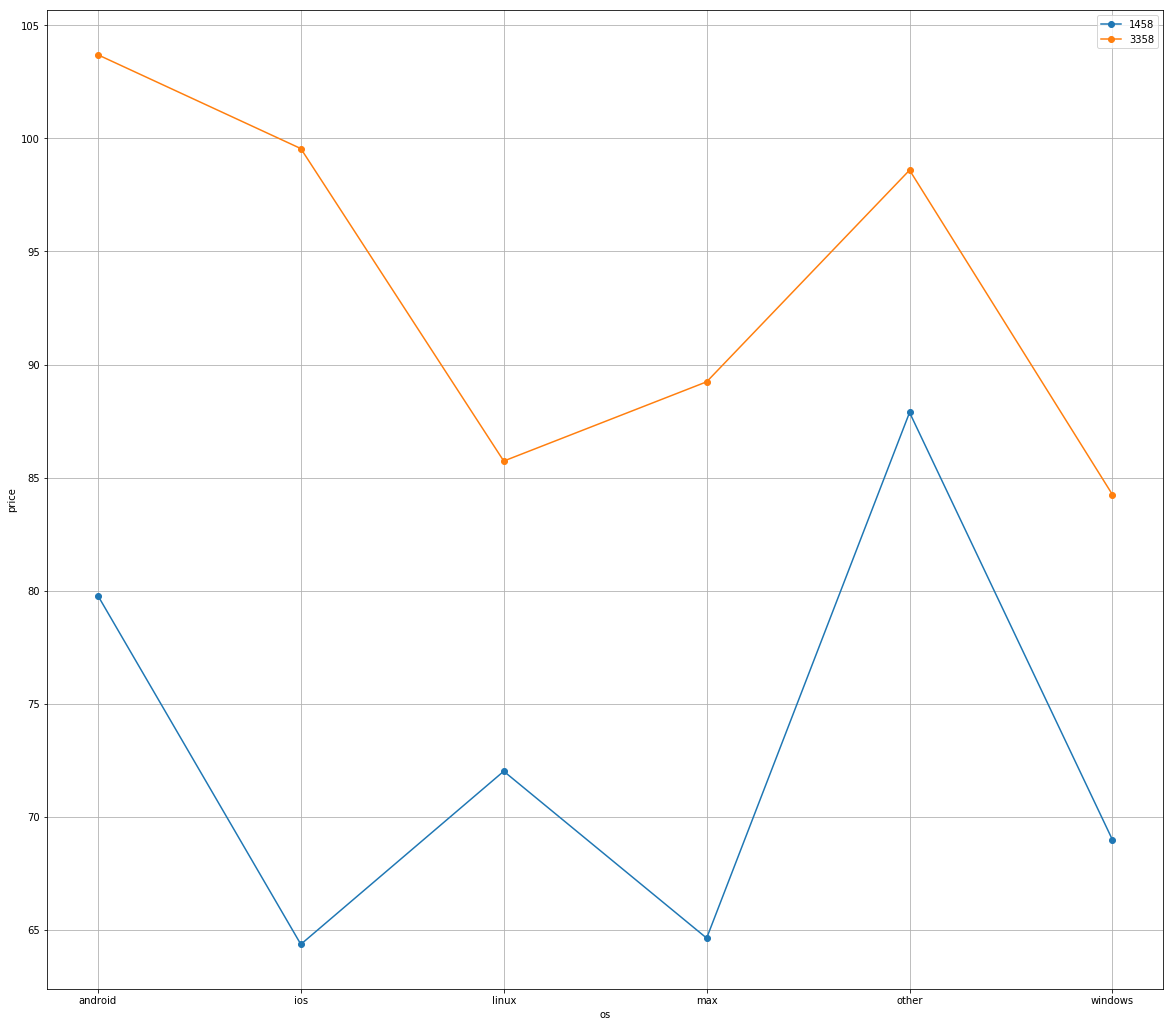

In [156]:
plot_data = {}
for adrs in advertisers:
    tmp = []
    for os in oss:
        pay_tmp = []
        for pay in payprices:
            try:
                price = size[os][adrs][pay]
                pay_tmp.append([pay, price])
            except:
                pass
        if pay_tmp==[]:
            tmp.append(0)
        else:
            a, b = 0., 0.
            for item in pay_tmp:
                a += item[0]*item[1]
                b += item[1]
            tmp.append(a/b)
    plot_data[adrs]=tmp

x=[0,1,2,3,4,5]
plt.figure(figsize=(20,18))
plt.xticks((0,1,2,3,4,5),(u'android',u'ios',u'linux',u'max',u'other',u'windows'))
for key,value in plot_data.items():
    if key in [1458, 3358]:
        plt.plot(x, value, label=key, marker = 'o')
plt.legend()
plt.grid()
# plt.ylim(0, 0.018)
plt.ylabel('price')
plt.xlabel('os')
plt.savefig('ospricesecond.png')
plt.show()

In [157]:
ccv = traindata.groupby(['browser','advertiser','payprice'])
size=ccv.size()
size

browser   advertiser  payprice
chrome    1458        3              3
                      4            786
                      5           2288
                      6            536
                      7            731
                      8            774
                      9            482
                      10          1868
                      11           517
                      12           698
                      13           815
                      14           553
                      15           696
                      16           987
                      17           877
                      18           882
                      19           578
                      20          8258
                      21           847
                      22           685
                      23           533
                      24           641
                      25           537
                      26           648
                      27         

In [158]:
browsers, advertisers, payprices = size.keys().levels
browsers, advertisers, payprices

(Index(['chrome', 'firefox', 'ie', 'maxthon', 'opera', 'other', 'safari',
        'sogou', 'theworld'],
       dtype='object', name='browser'),
 Int64Index([1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476], dtype='int64', name='advertiser'),
 Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             291, 292, 293, 294, 295, 296, 297, 298, 299, 300],
            dtype='int64', name='payprice', length=301))

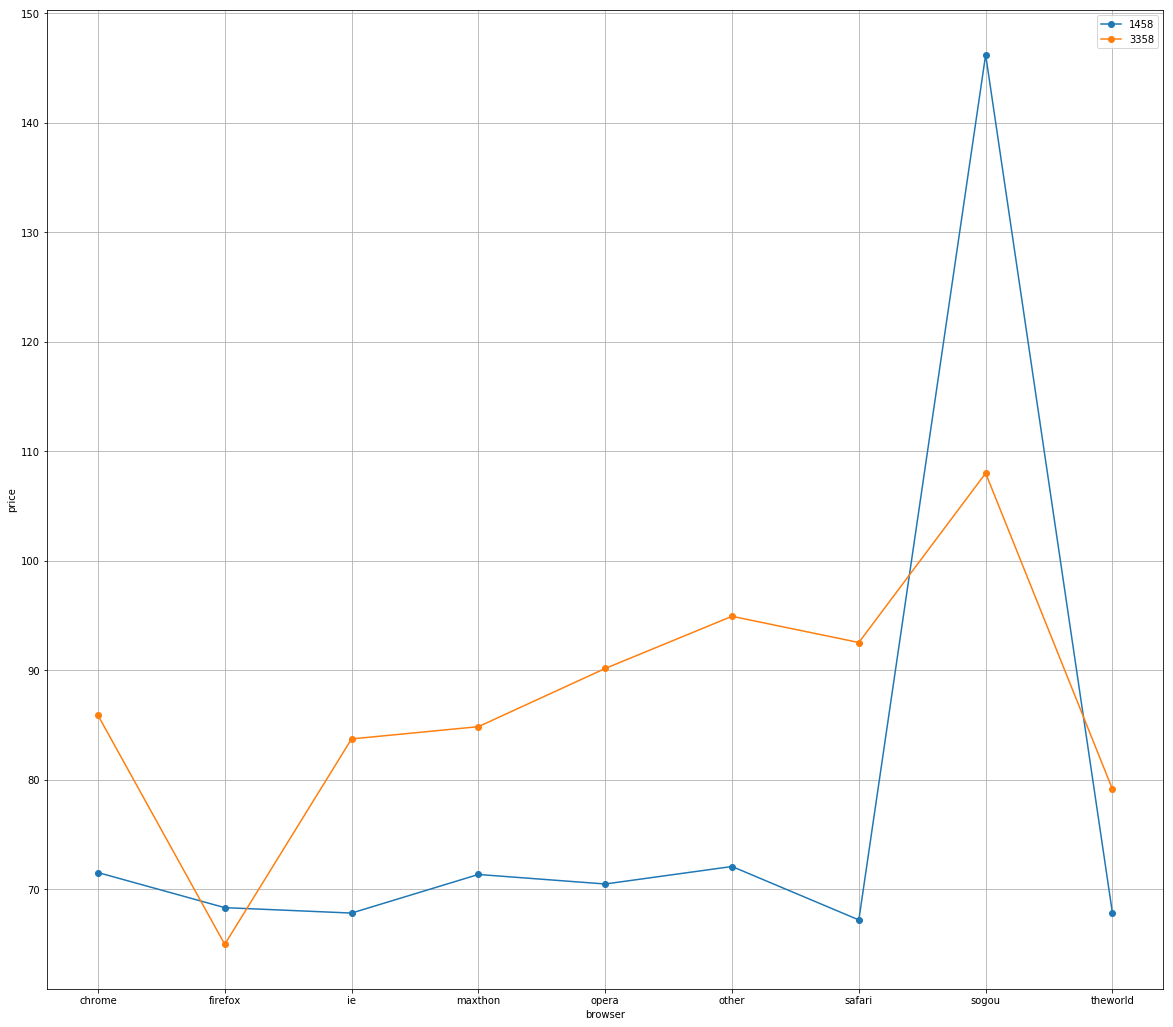

In [160]:
plot_data = {}
for adrs in advertisers:
    tmp = []
    for browser in browsers:
        pay_tmp = []
        for pay in payprices:
            try:
                price = size[browser][adrs][pay]
                pay_tmp.append([pay, price])
            except:
                pass
        if pay_tmp==[]:
            tmp.append(0)
        else:
            a, b = 0., 0.
            for item in pay_tmp:
                a += item[0]*item[1]
                b += item[1]
            tmp.append(a/b)
    plot_data[adrs]=tmp

x=[0,1,2,3,4,5,6,7,8]
plt.figure(figsize=(20,18))
plt.xticks((0,1,2,3,4,5,6,7,8),(u'chrome',u'firefox',u'ie',u'maxthon',u'opera',u'other',u'safari',u'sogou',u'theworld'))
for key,value in plot_data.items():
    if key in [1458, 3358]:
        plt.plot(x, value, label=key, marker = 'o')
plt.legend()
plt.grid()
# plt.ylim(0, 0.018)
plt.ylabel('price')
plt.xlabel('browser')
plt.savefig('browserpricesecond.png')
plt.show()

In [164]:
traindata["slotsize"] = traindata.slotwidth.astype(str).str.cat(traindata.slotheight.astype(str), sep='*')

In [165]:
ccv = traindata.groupby(['slotsize','advertiser','payprice'])
size=ccv.size()
size

slotsize  advertiser  payprice
1000*90   1458        10            840
                      17              2
                      18              4
                      20          13093
                      23             11
                      24              1
                      25              1
                      28              6
                      30           2167
                      32              1
                      33             12
                      35             42
                      36              1
                      37              5
                      39              5
                      40            179
                      42             36
                      43             94
                      45             36
                      46             11
                      47             26
                      48              5
                      49             68
                      50          20791
         

In [166]:
slotsizes, advertisers, payprices = size.keys().levels
slotsizes, advertisers, payprices

(Index(['1000*90', '120*240', '120*600', '125*125', '160*600', '180*150',
        '180*600', '200*200', '234*60', '250*230', '250*250', '300*100',
        '300*250', '300*300', '300*600', '320*50', '336*280', '360*300',
        '468*60', '620*60', '640*90', '728*90', '760*90', '910*90', '950*90',
        '960*60', '960*90', '980*80', '980*90'],
       dtype='object', name='slotsize'),
 Int64Index([1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476], dtype='int64', name='advertiser'),
 Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             291, 292, 293, 294, 295, 296, 297, 298, 299, 300],
            dtype='int64', name='payprice', length=301))

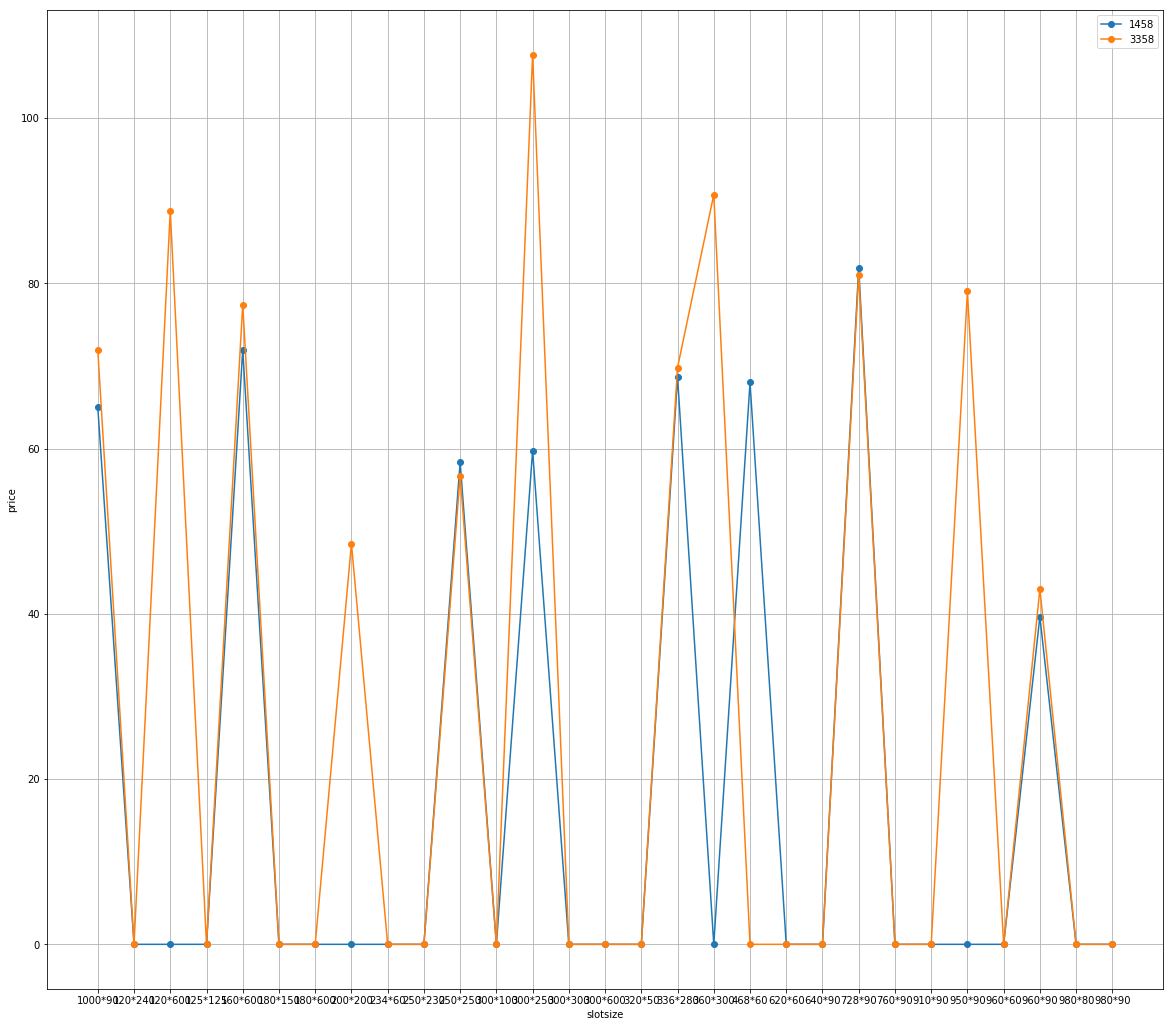

In [168]:
plot_data = {}
for adrs in advertisers:
    tmp = []
    for slotsize in slotsizes:
        pay_tmp = []
        for pay in payprices:
            try:
                price = size[slotsize][adrs][pay]
                pay_tmp.append([pay, price])
            except:
                pass
        if pay_tmp==[]:
            tmp.append(0)
        else:
            a, b = 0., 0.
            for item in pay_tmp:
                a += item[0]*item[1]
                b += item[1]
            tmp.append(a/b)
    plot_data[adrs]=tmp

x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]
plt.figure(figsize=(20,18))
plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28),
           (u'1000*90',u'120*240',u'120*600',u'125*125',u'160*600'
            ,u'180*150',u'180*600',u'200*200',u'234*60',u'250*230'
            ,u'250*250',u'300*100',u'300*250',u'300*300',u'300*600'
            ,u'320*50',u'336*280',u'360*300',u'468*60',u'620*60'
            ,u'640*90',u'728*90',u'760*90',u'910*90',u'950*90'
            ,u'960*60',u'960*90',u'980*80',u'980*90'))
for key,value in plot_data.items():
    if key in [1458, 3358]:
        plt.plot(x, value, label=key, marker = 'o')
plt.legend()
plt.grid()
# plt.ylim(0, 0.018)
plt.ylabel('price')
plt.xlabel('slotsize')
plt.savefig('slotsizepricesecond.png')
plt.show()

# eCPC

In [196]:
ccv1 = traindata.groupby(['weekday','advertiser','click'])
size1=ccv1.size()
size1
days, advertisers, clicks = size1.keys().levels
days, advertisers, clicks
ccv2 = traindata.groupby(['weekday','advertiser','payprice'])
size2=ccv2.size()
size2
_, _, payprices = size2.keys().levels
payprices

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            291, 292, 293, 294, 295, 296, 297, 298, 299, 300],
           dtype='int64', name='payprice', length=301)

In [176]:
size1

weekday  advertiser  click
0        1458        0        76320
                     1           52
         2259        0        35648
                     1           13
         2821        0        99859
                     1           70
         3358        0        29482
                     1           22
         3386        0        70808
                     1           53
         3427        0        50154
                     1           29
         3476        0        58413
                     1           32
1        1458        0        66182
                     1           63
         2259        0        27052
                     1            9
         2821        0        83996
                     1           47
         3358        0        26707
                     1           16
         3386        0        61115
                     1           44
         3427        0        54156
                     1           33
         3476        0        48707
 

In [190]:
size2

weekday  advertiser  payprice
0        1458        4            584
                     5           1150
                     6            296
                     7            418
                     8            439
                     9            347
                     10           933
                     11           239
                     12           465
                     13           448
                     14           299
                     15           397
                     16          1219
                     17          1377
                     18           477
                     19           438
                     20          7718
                     21           391
                     22           213
                     23           323
                     24           288
                     25           298
                     26           614
                     27           614
                     28           376
                    

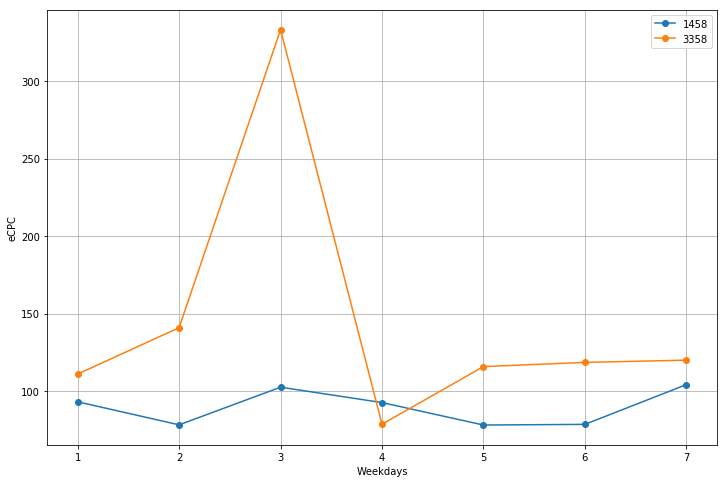

In [203]:
plot_data = {}
for adrs in advertisers:
    tmp = []
    for day in days:
        try:
            click = size1[day][adrs][1]
            pay_tmp = []
            for pay in payprices:
                try:
                    num = size2[day][adrs][pay]
                    pay_tmp.append([pay, num])
                except:
                    pass
            if pay_tmp==[]:
                tmp.append(0)
            else:
                a, b = 0., 0.
                for item in pay_tmp:
                    a += item[0]*item[1]
                tmp.append(a/click/1000)
        except:
            tmp.append(0)
    plot_data[adrs]=tmp
plt.figure(figsize=(12,8))
x = [1,2,3,4,5,6,7]
for key,value in plot_data.items():
    if key in [1458, 3358]:
        plt.plot(x, value, label=key, marker = 'o')
plt.legend()
plt.grid()
# plt.ylim(0, 0.018)
plt.ylabel('eCPC')
plt.xlabel('Weekdays')
plt.savefig('weekdayecpcsecond.png')
plt.show()

In [205]:
ccv1 = traindata.groupby(['hour','advertiser','click'])
size1=ccv1.size()
size1
hours, advertisers, clicks = size1.keys().levels
hours, advertisers, clicks
ccv2 = traindata.groupby(['hour','advertiser','payprice'])
size2=ccv2.size()
size2
_, _, payprices = size2.keys().levels
payprices

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            291, 292, 293, 294, 295, 296, 297, 298, 299, 300],
           dtype='int64', name='payprice', length=301)

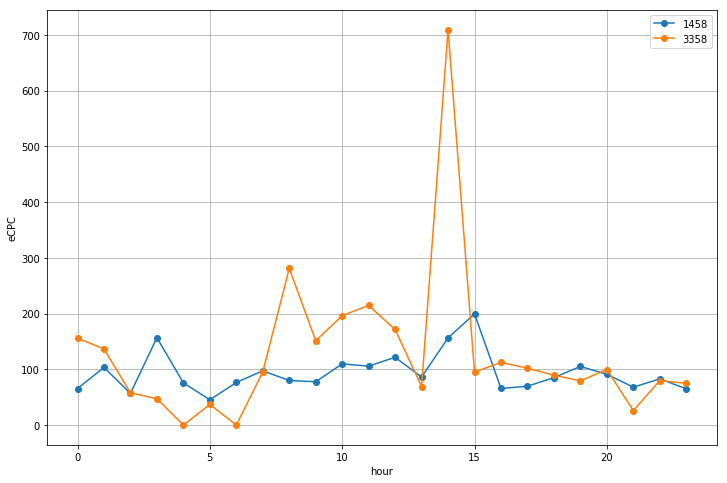

In [208]:
plot_data = {}
for adrs in advertisers:
    tmp = []
    for hour in hours:
        try:
            click = size1[hour][adrs][1]
            pay_tmp = []
            for pay in payprices:
                try:
                    num = size2[hour][adrs][pay]
                    pay_tmp.append([pay, num])
                except:
                    pass
            if pay_tmp==[]:
                tmp.append(0)
            else:
                a, b = 0., 0.
                for item in pay_tmp:
                    a += item[0]*item[1]
                tmp.append(a/click/1000)
        except:
            tmp.append(0)
    plot_data[adrs]=tmp
plt.figure(figsize=(12,8))
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
for key,value in plot_data.items():
    if key in [1458, 3358]:
        plt.plot(x, value, label=key, marker = 'o')
plt.legend()
plt.grid()
# plt.ylim(0, 0.018)
plt.ylabel('eCPC')
plt.xlabel('hour')
plt.savefig('hourecpcsecond.png')
plt.show()

In [213]:
ccv1 = traindata.groupby(['adexchange','advertiser','click'])
size1=ccv1.size()
size1
adexchanges, advertisers, clicks = size1.keys().levels
adexchanges, advertisers, clicks
ccv2 = traindata.groupby(['adexchange','advertiser','payprice'])
size2=ccv2.size()
size2
_, _, payprices = size2.keys().levels
payprices

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            291, 292, 293, 294, 295, 296, 297, 298, 299, 300],
           dtype='int64', name='payprice', length=301)

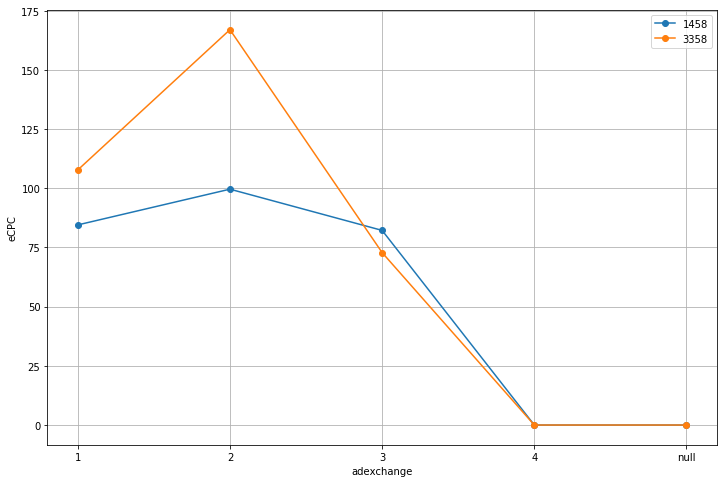

In [215]:
plot_data = {}
for adrs in advertisers:
    tmp = []
    for adexchange in adexchanges:
        try:
            click = size1[adexchange][adrs][1]
            pay_tmp = []
            for pay in payprices:
                try:
                    num = size2[adexchange][adrs][pay]
                    pay_tmp.append([pay, num])
                except:
                    pass
            if pay_tmp==[]:
                tmp.append(0)
            else:
                a, b = 0., 0.
                for item in pay_tmp:
                    a += item[0]*item[1]
                tmp.append(a/click/1000)
        except:
            tmp.append(0)
    plot_data[adrs]=tmp
plt.figure(figsize=(12,8))
x = [1,2,3,4,5]
plt.xticks((1,2,3,4,5),(u'1',u'2',u'3',u'4',u'null'))
for key,value in plot_data.items():
    if key in [1458, 3358]:
        plt.plot(x, value, label=key, marker = 'o')
plt.legend()
plt.grid()
# plt.ylim(0, 0.018)
plt.ylabel('eCPC')
plt.xlabel('adexchange')
plt.savefig('adexchangeecpcsecond.png')
plt.show()

In [216]:
ccv1 = traindata.groupby(['region','advertiser','click'])
size1=ccv1.size()
size1
regions, advertisers, clicks = size1.keys().levels
regions, advertisers, clicks
ccv2 = traindata.groupby(['region','advertiser','payprice'])
size2=ccv2.size()
size2
_, _, payprices = size2.keys().levels
payprices

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            291, 292, 293, 294, 295, 296, 297, 298, 299, 300],
           dtype='int64', name='payprice', length=301)

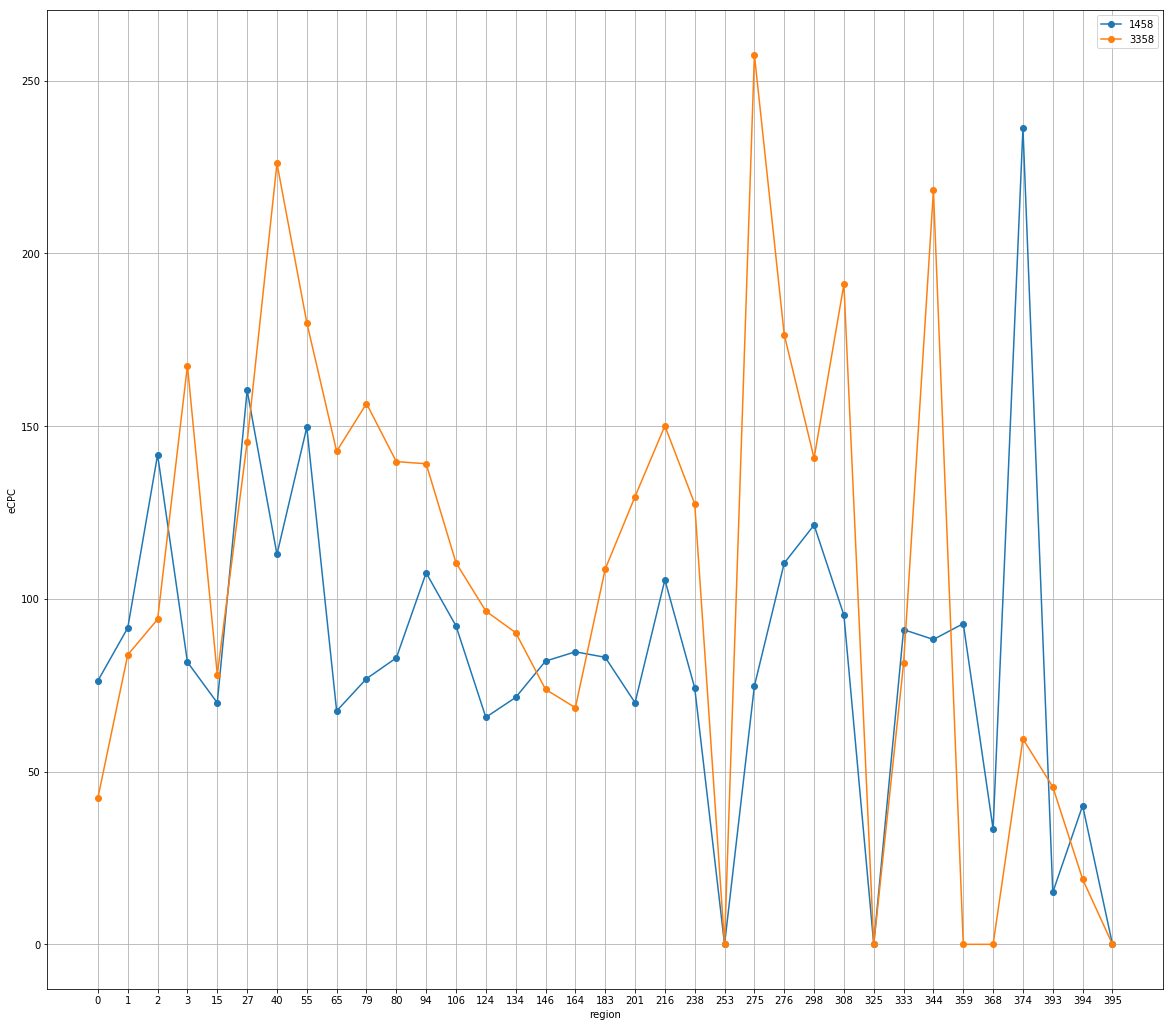

In [218]:
plot_data = {}
for adrs in advertisers:
    tmp = []
    for region in regions:
        try:
            click = size1[region][adrs][1]
            pay_tmp = []
            for pay in payprices:
                try:
                    num = size2[region][adrs][pay]
                    pay_tmp.append([pay, num])
                except:
                    pass
            if pay_tmp==[]:
                tmp.append(0)
            else:
                a, b = 0., 0.
                for item in pay_tmp:
                    a += item[0]*item[1]
                tmp.append(a/click/1000)
        except:
            tmp.append(0)
    plot_data[adrs]=tmp
x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,
            15,16,17,18,19,20,21,22,23,24,25,26,
            27,28,29,30,31,32,33,34]
plt.figure(figsize=(20,18))
plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,
            15,16,17,18,19,20,21,22,23,24,25,26,
            27,28,29,30,31,32,33,34),
           (u'0',u'1',u'2',u'3',u'15',
            u'27',u'40',u'55',u'65',
            u'79',u'80',u'94',u'106',
           u'124',u'134',u'146',u'164',
           u'183',u'201',u'216',u'238',
           u'253',u'275',u'276',u'298',
           u'308',u'325',u'333',u'344',
           u'359',u'368',u'374',u'393',
           u'394',u'395'))
for key,value in plot_data.items():
    if key in [1458, 3358]:
        plt.plot(x, value, label=key, marker = 'o')
plt.legend()
plt.grid()
# plt.ylim(0, 0.018)
plt.ylabel('eCPC')
plt.xlabel('region')
plt.savefig('regionecpcsecond.png')
plt.show()

In [219]:
ccv1 = traindata.groupby(['os','advertiser','click'])
size1=ccv1.size()
size1
oss, advertisers, clicks = size1.keys().levels
oss, advertisers, clicks
ccv2 = traindata.groupby(['os','advertiser','payprice'])
size2=ccv2.size()
size2
_, _, payprices = size2.keys().levels
payprices

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            291, 292, 293, 294, 295, 296, 297, 298, 299, 300],
           dtype='int64', name='payprice', length=301)

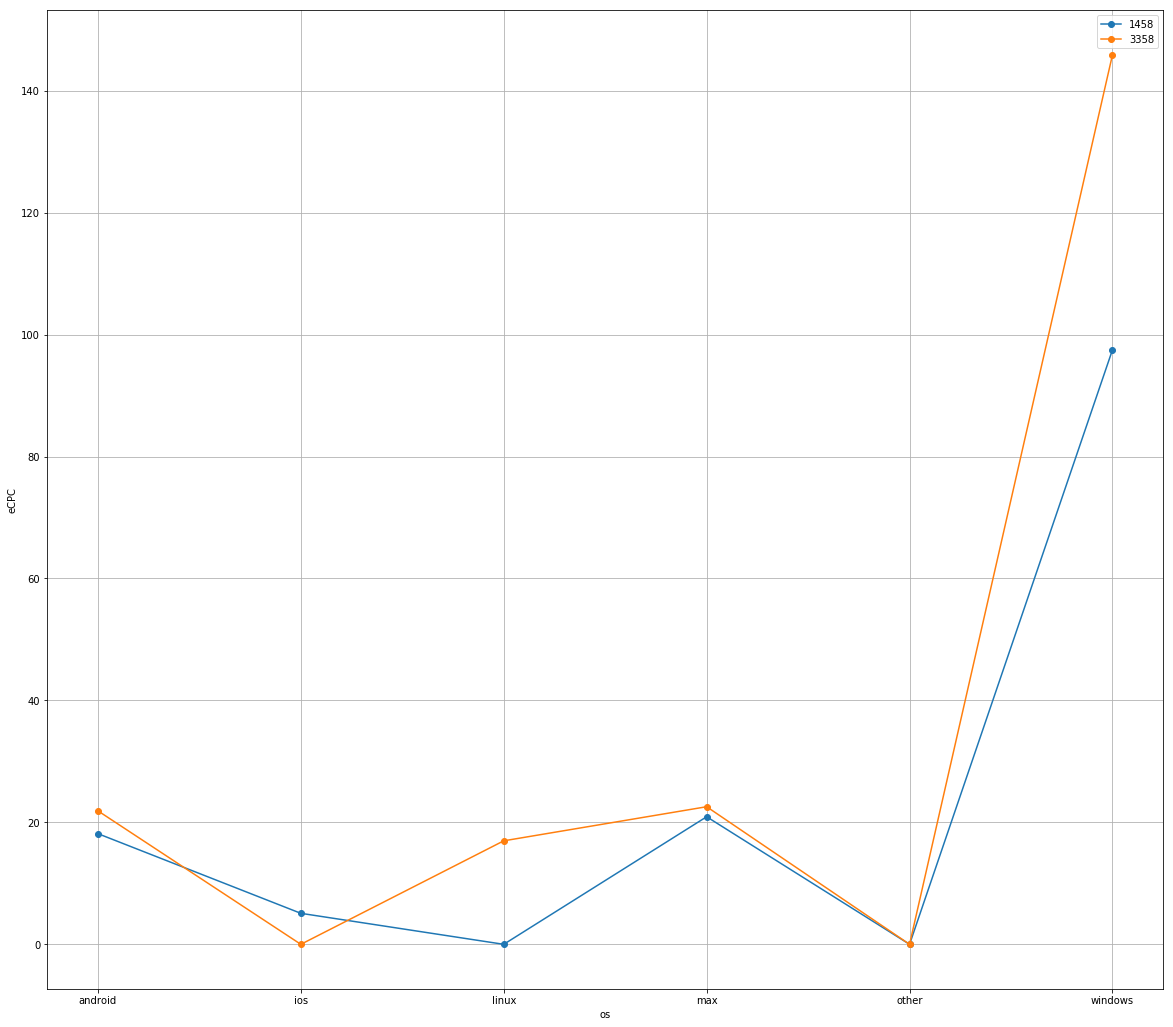

In [222]:
plot_data = {}
for adrs in advertisers:
    tmp = []
    for os in oss:
        try:
            click = size1[os][adrs][1]
            pay_tmp = []
            for pay in payprices:
                try:
                    num = size2[os][adrs][pay]
                    pay_tmp.append([pay, num])
                except:
                    pass
            if pay_tmp==[]:
                tmp.append(0)
            else:
                a, b = 0., 0.
                for item in pay_tmp:
                    a += item[0]*item[1]
                tmp.append(a/click/1000)
        except:
            tmp.append(0)
    plot_data[adrs]=tmp
x=[0,1,2,3,4,5]
plt.figure(figsize=(20,18))
plt.xticks((0,1,2,3,4,5),(u'android',u'ios',u'linux',u'max',u'other',u'windows'))
for key,value in plot_data.items():
    if key in [1458, 3358]:
        plt.plot(x, value, label=key, marker = 'o')
plt.legend()
plt.grid()
# plt.ylim(0, 0.018)
plt.ylabel('eCPC')
plt.xlabel('os')
plt.savefig('osecpcsecond.png')
plt.show()

In [223]:
ccv1 = traindata.groupby(['browser','advertiser','click'])
size1=ccv1.size()
size1
browsers, advertisers, clicks = size1.keys().levels
browsers, advertisers, clicks
ccv2 = traindata.groupby(['browser','advertiser','payprice'])
size2=ccv2.size()
size2
_, _, payprices = size2.keys().levels
payprices

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            291, 292, 293, 294, 295, 296, 297, 298, 299, 300],
           dtype='int64', name='payprice', length=301)

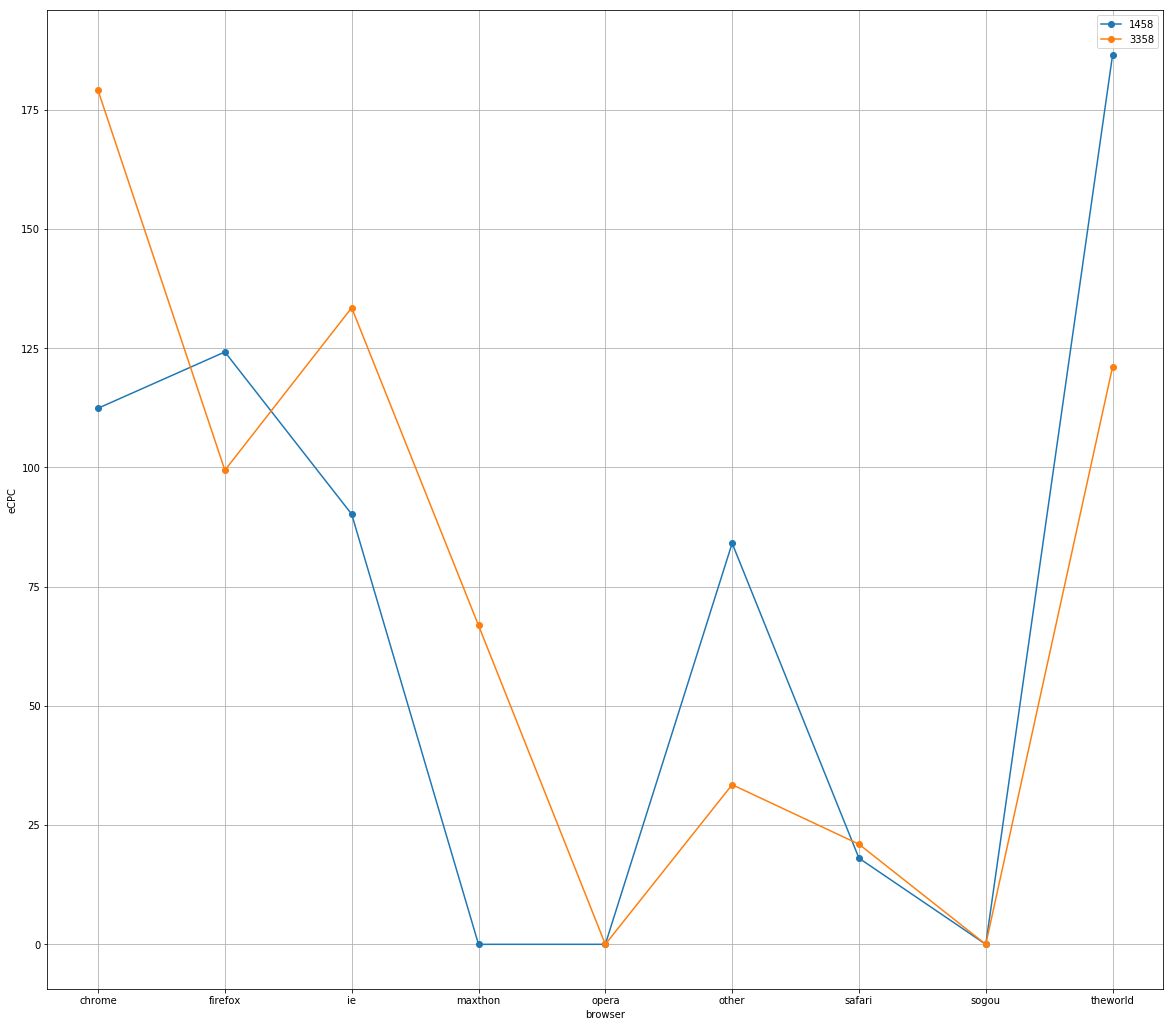

In [225]:
plot_data = {}
for adrs in advertisers:
    tmp = []
    for browser in browsers:
        try:
            click = size1[browser][adrs][1]
            pay_tmp = []
            for pay in payprices:
                try:
                    num = size2[browser][adrs][pay]
                    pay_tmp.append([pay, num])
                except:
                    pass
            if pay_tmp==[]:
                tmp.append(0)
            else:
                a, b = 0., 0.
                for item in pay_tmp:
                    a += item[0]*item[1]
                tmp.append(a/click/1000)
        except:
            tmp.append(0)
    plot_data[adrs]=tmp
x=[0,1,2,3,4,5,6,7,8]
plt.figure(figsize=(20,18))
plt.xticks((0,1,2,3,4,5,6,7,8),(u'chrome',u'firefox',u'ie',u'maxthon',u'opera',u'other',u'safari',u'sogou',u'theworld'))
for key,value in plot_data.items():
    if key in [1458, 3358]:
        plt.plot(x, value, label=key, marker = 'o')
plt.legend()
plt.grid()
# plt.ylim(0, 0.018)
plt.ylabel('eCPC')
plt.xlabel('browser')
plt.savefig('browserecpcsecond.png')
plt.show()

In [226]:
ccv1 = traindata.groupby(['slotsize','advertiser','click'])
size1=ccv1.size()
size1
slotsizes, advertisers, clicks = size1.keys().levels
slotsizes, advertisers, clicks
ccv2 = traindata.groupby(['slotsize','advertiser','payprice'])
size2=ccv2.size()
size2
_, _, payprices = size2.keys().levels
payprices

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            291, 292, 293, 294, 295, 296, 297, 298, 299, 300],
           dtype='int64', name='payprice', length=301)

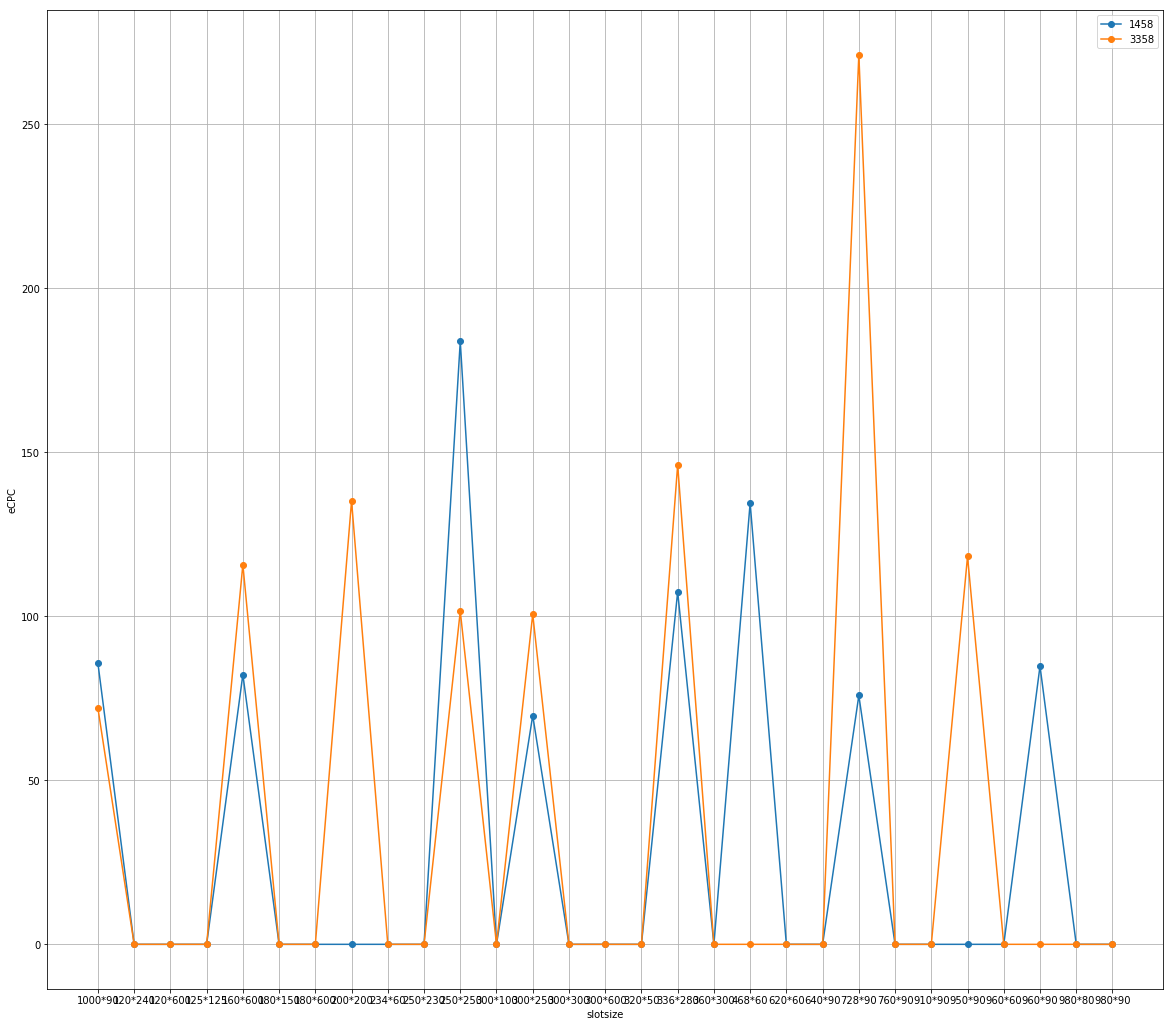

In [228]:
plot_data = {}
for adrs in advertisers:
    tmp = []
    for slotsize in slotsizes:
        try:
            click = size1[slotsize][adrs][1]
            pay_tmp = []
            for pay in payprices:
                try:
                    num = size2[slotsize][adrs][pay]
                    pay_tmp.append([pay, num])
                except:
                    pass
            if pay_tmp==[]:
                tmp.append(0)
            else:
                a, b = 0., 0.
                for item in pay_tmp:
                    a += item[0]*item[1]
                tmp.append(a/click/1000)
        except:
            tmp.append(0)
    plot_data[adrs]=tmp
x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]
plt.figure(figsize=(20,18))
plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28),
           (u'1000*90',u'120*240',u'120*600',u'125*125',u'160*600'
            ,u'180*150',u'180*600',u'200*200',u'234*60',u'250*230'
            ,u'250*250',u'300*100',u'300*250',u'300*300',u'300*600'
            ,u'320*50',u'336*280',u'360*300',u'468*60',u'620*60'
            ,u'640*90',u'728*90',u'760*90',u'910*90',u'950*90'
            ,u'960*60',u'960*90',u'980*80',u'980*90'))
for key,value in plot_data.items():
    if key in [1458, 3358]:
        plt.plot(x, value, label=key, marker = 'o')
plt.legend()
plt.grid()
# plt.ylim(0, 0.018)
plt.ylabel('eCPC')
plt.xlabel('slotsize')
plt.savefig('slotsizeecpcsecond.png')
plt.show()

In [69]:
traindata.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')